In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scpystats
from sklearn import datasets

In [2]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.train = X
        self.train_labels = y
        self.trainSquare = np.sum(X.T**2,axis=0,keepdims=True)
    
    def predict(self, X):
        D = -2. * np.dot(X,self.train.T) + self.trainSquare
        y = scpystats.mode(self.train_labels[np.argpartition(D, self.k, axis=1)[:,:self.k+1]], axis=1)
        return y[0].flatten()

In [3]:
iris = datasets.load_iris()
data = np.array(iris.data)
labels = iris.target

In [4]:
permData = np.random.permutation(np.concatenate((data.T, labels[np.newaxis])).T)
train_data = permData[:100,:4]
train_labels = permData[:100,4]
test_data = permData[100:,:4]
test_labels = permData[100:,4]

In [5]:
knn = KNN(5)
knn.fit(train_data, train_labels)

In [6]:
y = knn.predict(test_data)

In [7]:
y.shape

(50,)

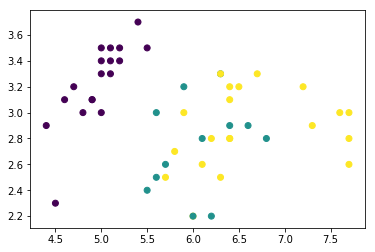

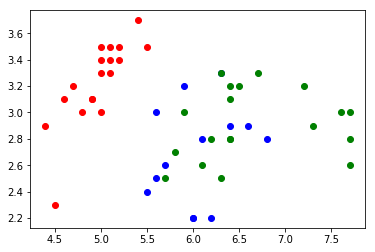

In [8]:
plt.scatter(test_data[:,0],test_data[:,1], marker='o',c=test_labels)
plt.show()

plt.plot(test_data[y==0,0],test_data[y==0,1], 'ro')
plt.plot(test_data[y==1,0],test_data[y==1,1], 'bo')
plt.plot(test_data[y==2,0],test_data[y==2,1], 'go')
plt.show()

In [9]:
np.sum(y == test_labels)/50

0.97999999999999998

In [10]:
for i in range(5):
    permData = np.random.permutation(np.concatenate((data.T, labels[np.newaxis])).T)
    train_data = permData[:100,:4]
    train_labels = permData[:100,4]
    test_data = permData[100:,:4]
    test_labels = permData[100:,4]
    
    knn = KNN(5)
    knn.fit(train_data, train_labels)
    
    y = knn.predict(test_data)
    
    print(np.sum(y == test_labels)/50)

0.94
0.96
0.98
0.94
0.98


In [11]:
for i in range(5):
    permData = np.random.permutation(np.concatenate((data.T, labels[np.newaxis])).T)
    train_data = permData[:100,:4]
    train_labels = permData[:100,4]
    test_data = permData[100:,:4]
    test_labels = permData[100:,4]
    
    knn = KNN(7)
    knn.fit(train_data, train_labels)
    
    y = knn.predict(test_data)
    
    print(np.sum(y == test_labels)/50)

0.9
0.96
0.92
1.0
0.94


In [12]:
for i in range(5):
    permData = np.random.permutation(np.concatenate((data.T, labels[np.newaxis])).T)
    train_data = permData[:100,:4]
    train_labels = permData[:100,4]
    test_data = permData[100:,:4]
    test_labels = permData[100:,4]
    
    knn = KNN(3)
    knn.fit(train_data, train_labels)
    
    y = knn.predict(test_data)
    
    print(np.sum(y == test_labels)/50)

0.98
1.0
0.96
1.0
0.98


In [13]:
digitsTrain = pd.read_csv('/home/dominik/Dokumenty/Studia/Data-mining/Lista5-trees/digits.tra', header=None)
digitsTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [14]:
digitsTest = pd.read_csv('/home/dominik/Dokumenty/Studia/Data-mining/Lista5-trees/digits.tes', header=None)
digitsTest.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [15]:
for k in range(1,10,2):
    knn = KNN(k)
    data = np.array(digitsTrain)
    trainData = data[:,:-1]
    traiLabels = data[:,-1]
    knn.fit(trainData, traiLabels)
    
    test = np.array(digitsTest)
    testData = test[:,:-1]
    testLabels = test[:,-1]
    
    y = knn.predict(testData)
    
    print(np.sum(y == testLabels)/len(y))    

0.973845297718
0.976071229827
0.977740678909
0.976627712855
0.9755147468


### Iris cross validation

In [16]:
iris = datasets.load_iris()
data = np.array(iris.data)
labels = iris.target

In [17]:
mask = np.random.uniform(0,1,150)
err = 0
for i in  range(10):
    data_test = data[(mask >= i*0.1) & (mask < (i+1)*0.1),:]
    data_train = data[(mask < i*0.1) | (mask >= (i+1)*0.1),:]
    
    labels_test = labels[(mask >= i*0.1) & (mask < (i+1)*0.1)]
    labels_train = labels[(mask < i*0.1) | (mask >= (i+1)*0.1)]
    
    knn = KNN(1)
    knn.fit(data_train, labels_train)
    
    y = knn.predict(data_test)
    
    err += np.sum(y != labels_test)
    print(np.sum(y == labels_test)/len(y))
print('Global error: ',err)

1.0
0.952380952381
0.933333333333
1.0
0.894736842105
0.882352941176
1.0
1.0
0.9375
0.777777777778
Global error:  9


In [18]:
mask = np.random.uniform(0,1,150)
err = 0
for i in  range(10):
    data_test = data[(mask >= i*0.1) & (mask < (i+1)*0.1),:]
    data_train = data[(mask < i*0.1) | (mask >= (i+1)*0.1),:]
    
    labels_test = labels[(mask >= i*0.1) & (mask < (i+1)*0.1)]
    labels_train = labels[(mask < i*0.1) | (mask >= (i+1)*0.1)]
    
    knn = KNN(5)
    knn.fit(data_train, labels_train)
    
    y = knn.predict(data_test)
    
    err += np.sum(y != labels_test)
    print(np.sum(y == labels_test)/len(y))
print('Global error: ',err)

1.0
0.923076923077
1.0
0.8
1.0
1.0
1.0
1.0
0.888888888889
0.947368421053
Global error:  6


In [19]:
mask = np.random.uniform(0,1,150)
err = 0
for i in  range(10):
    data_test = data[(mask >= i*0.1) & (mask < (i+1)*0.1),:]
    data_train = data[(mask < i*0.1) | (mask >= (i+1)*0.1),:]
    
    labels_test = labels[(mask >= i*0.1) & (mask < (i+1)*0.1)]
    labels_train = labels[(mask < i*0.1) | (mask >= (i+1)*0.1)]
    
    knn = KNN(3)
    knn.fit(data_train, labels_train)
    
    y = knn.predict(data_test)
    
    err += np.sum(y != labels_test)
    print(np.sum(y == labels_test)/len(y))
print('Global error: ',err)

1.0
0.9375
1.0
0.947368421053
0.882352941176
0.933333333333
1.0
0.9375
1.0
0.916666666667
Global error:  7


In [20]:
mask = np.random.uniform(0,1,150)
err = 0
for i in  range(10):
    data_test = data[(mask >= i*0.1) & (mask < (i+1)*0.1),:]
    data_train = data[(mask < i*0.1) | (mask >= (i+1)*0.1),:]
    
    labels_test = labels[(mask >= i*0.1) & (mask < (i+1)*0.1)]
    labels_train = labels[(mask < i*0.1) | (mask >= (i+1)*0.1)]
    
    knn = KNN(7)
    knn.fit(data_train, labels_train)
    
    y = knn.predict(data_test)
    
    err += np.sum(y != labels_test)
    print(np.sum(y == labels_test)/len(y))
print('Global error: ',err)

1.0
0.928571428571
1.0
0.9375
1.0
0.941176470588
1.0
1.0
0.954545454545
1.0
Global error:  4
